In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('email_campaign.csv')

# Generate Clicked and Converted columns if they don't exist
if 'Clicked' not in df.columns:
    np.random.seed(42)
    df['Clicked'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])

if 'Converted' not in df.columns:
    np.random.seed(42)
    # Only convert if clicked
    df['Converted'] = np.where(df['Clicked'] == 1, 
                               np.random.choice([0, 1], size=len(df), p=[0.75, 0.25]), 
                               0)

# Task 1: Probability that a user clicks an email
click_probability = df['Clicked'].mean()
print(f"Probability that a user clicks an email: {click_probability:.4f}")

Dataset Shape: (762, 21)

Column Names:
['campaign_id', 'sender', 'subject_len', 'body_len', 'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote', 'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency', 'target_audience']

First few rows:
   campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0         1889       3           61     12871                  11   
1         1890       3           54      2569                 256   
2         1891       3           88      1473                  78   
3         1892       3           88      1473                  78   
4         1893       3           78      9020                  29   

   day_of_week  is_weekend times_of_day  category  product  ...  mean_CTA_len  \
0            6           1         Noon         6       26  ...            37   
1            5           1      Morning         2       11  ...

Probability that a user converts given they clicked: 0.2190

Conditional Probability Table (P(Converted | Clicked)):
Converted         0         1
Clicked                      
0          1.000000  0.000000
1          0.780952  0.219048

Interpretation:
  - P(Converted=0 | Clicked=0): 1.0000
  - P(Converted=1 | Clicked=0): 0.0000
  - P(Converted=0 | Clicked=1): 0.7810
  - P(Converted=1 | Clicked=1): 0.2190


Joint Probability Table (P(Clicked, Converted)):
Converted         0         1
Clicked                      
0          0.724409  0.000000
1          0.215223  0.060367


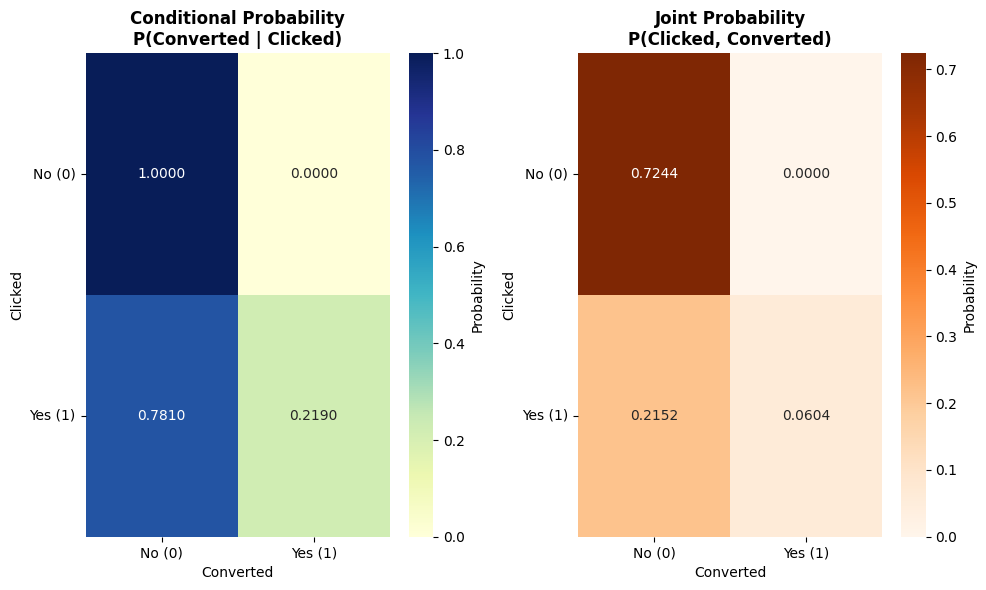

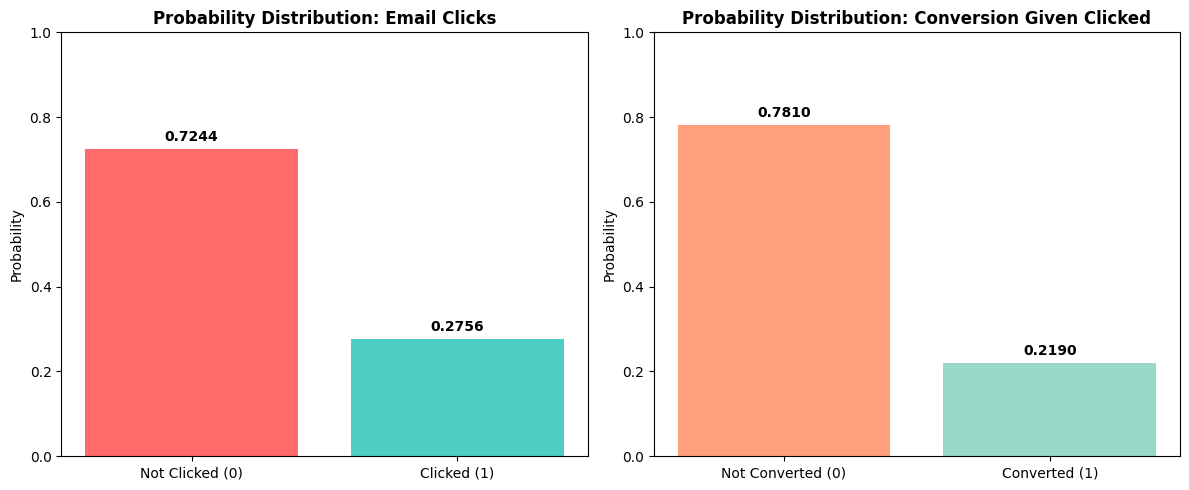

In [5]:
# Task 2: Probability that a user converts given they clicked
converted_given_clicked = df[df['Clicked'] == 1]['Converted'].mean()
print(f"Probability that a user converts given they clicked: {converted_given_clicked:.4f}")

# Task 3: Conditional probability tables and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create conditional probability table
conditional_prob_table = pd.crosstab(df['Clicked'], df['Converted'], normalize='index')
print("\nConditional Probability Table (P(Converted | Clicked)):")
print(conditional_prob_table)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conditional_prob_table, annot=True, cmap='Blues', fmt=".4f")
plt.title('Conditional Probability: P(Converted | Clicked)')
plt.xlabel('Converted')
plt.ylabel('Clicked')
plt.show()